# Heart Disease prediction
- [Data](./data/heart.csv) is from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
- Original dataset is from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease)

<details>
<summary><b>Additional Information</b></summary>
<p><a href="./data/heart.csv">heart.csv</a> is training data with id as index.</p>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
 this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).</p>
</details>

<details>
<summary><b>Columns Description</b></summary>
<p>

1. **age**: Age in years
2. **Sex**: sex (1 = male; 0 = female)
3. **cp**:  chest pain type
- 1: typical angina
- 2: atypical angina
- 3: non-anginal pain
- 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**:  (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
- 0: normal
- 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9.  **exang**:  exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
- 1: upsloping
- 2: flat
- 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

***Target Variable***
14. **num**: diagnosis of heart disease (angiographic disease status)
- 0: < 50% diameter narrowing
- 1: > 50% diameter narrowing
</p>
</details>

## Idea
Use *logistic regression* to predict heart disease.

## Approach
1. Import required libraries
2. Load data
3. Feature Selection
4. EDA
5. Feature Scaling
6. Use *Logistic Regression*
7. Fit the data
8.  Predict *target* on sample test data

## 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
plt.style.use("seaborn")

## 2. Loading data

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
1,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
2,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
3,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
4,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0


## 3. Feature Selection
- Using `mutual_info_classif()` function to get most important features
- Selecting common features from them

In [3]:
def get_mi_scores(X:pd.DataFrame, Y:pd.Series, discrete_features:list[bool]) -> pd.Series:
    """
    Use `mutual_info_classif` to find
    mutual information between features & target.
    Args:
        X: input data
        Y: target variable
        discrete_features: a list of bool values represent discerete/continuous features.
    Returns:
        mi_scores: A series of MI scores in descending order.
    """
    X = X.copy()
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns).sort_values(ascending=False)
    return mi_scores

In [4]:
discrete_features = {}
for i in train_data.columns[:-1]:
    discrete_features[i] = len(train_data[i].value_counts()) <= 5
discrete_features

{'age': False,
 'sex': True,
 'cp': True,
 'trestbps': False,
 'chol': False,
 'fbs': True,
 'restecg': True,
 'thalach': False,
 'exang': True,
 'oldpeak': False,
 'slope': True,
 'ca': True,
 'thal': True}

In [5]:
mi_scores = get_mi_scores(train_data[discrete_features.keys()], train_data["target"], discrete_features=list(discrete_features.values()))
mi_scores

chol        0.223058
oldpeak     0.158173
thalach     0.151674
cp          0.140340
thal        0.130107
ca          0.128182
exang       0.097918
slope       0.075552
trestbps    0.069456
age         0.066960
sex         0.042649
restecg     0.021491
fbs         0.000666
Name: MI Scores, dtype: float64

In [6]:
features = ["chol", "thalach", "cp", "exang", "age", "sex", "trestbps", "fbs"]
train_data[features + ["target"]].head()

,chol,thalach,cp,exang,age,sex,trestbps,fbs,target
0,244,178,3,0,42,1,148,0,1
1,278,152,2,0,66,0,146,0,1
2,246,173,2,0,53,1,130,1,1
3,248,122,0,0,58,0,100,0,1
4,282,95,0,1,53,1,123,0,0


In [7]:
X = train_data[features].copy(True)
Y = train_data["target"].copy(True)
X_test = test_data[features].copy(True)

## 4. Exploratory Data Analysis

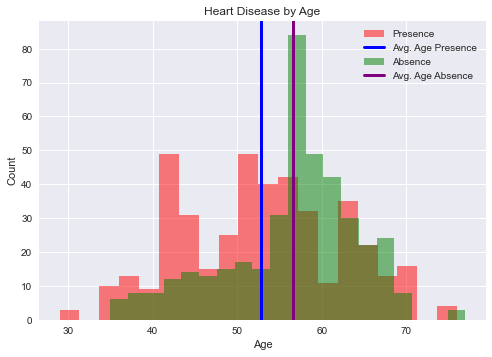

In [8]:
has_heart_disease = train_data["target"]==1
plt.title("Heart Disease by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(train_data[has_heart_disease]["age"], bins=20, alpha=0.5, color="red", label="Presence")
plt.axvline(train_data[has_heart_disease]["age"].mean(), color="blue", label="Avg. Age Presence", linewidth=3)

plt.hist(train_data[~has_heart_disease]["age"], bins=20, alpha=0.5, color="green", label="Absence")
plt.axvline(train_data[~has_heart_disease]["age"].mean(), color="purple", label="Avg. Age Absence", linewidth=3)
plt.legend()

<AxesSubplot:>

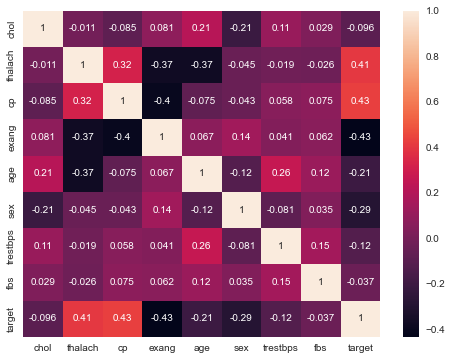

In [9]:
corr = train_data[features + ["target"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)

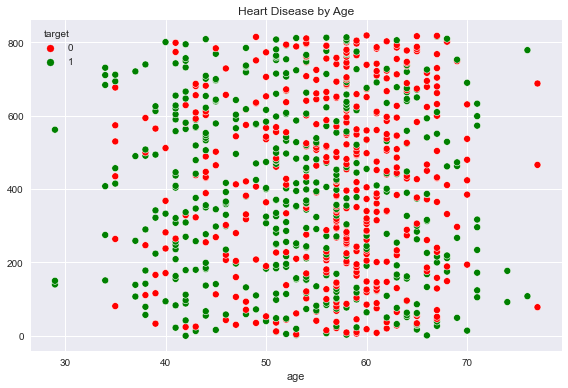

In [10]:
plt.title("Heart Disease by Age")
sns.scatterplot(x=X["age"], y=X.index, hue=Y, palette=["red", "green"])
plt.tight_layout()

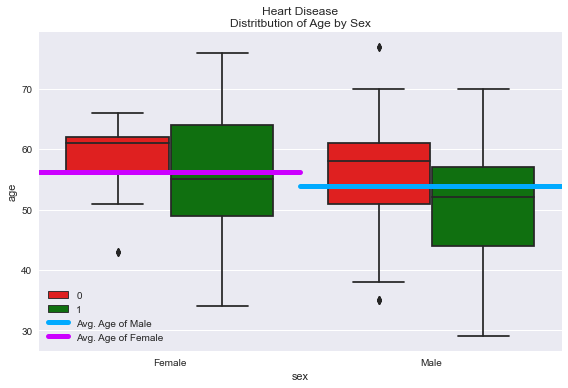

In [11]:
plt.title("Heart Disease\nDistritbution of Age by Sex")
sns.boxplot(x=X["sex"], y=X["age"], hue=Y, palette=["red", "green"])
plt.xticks([0, 1], ["Female", "Male"])

plt.axhline(X[X["sex"]==1]["age"].mean(), color="#00AAFF", label="Avg. Age of Male", xmin=0.5, linewidth=5)
plt.axhline(X[X["sex"]==0]["age"].mean(), color="#CC00FF", label="Avg. Age of Female", xmin=0, xmax=0.5, linewidth=5)

plt.legend(loc="lower left")
plt.tight_layout()

- Males 50+ yrs have high chance of heart disease
- Females 55+ yrs have high chance of heart disease

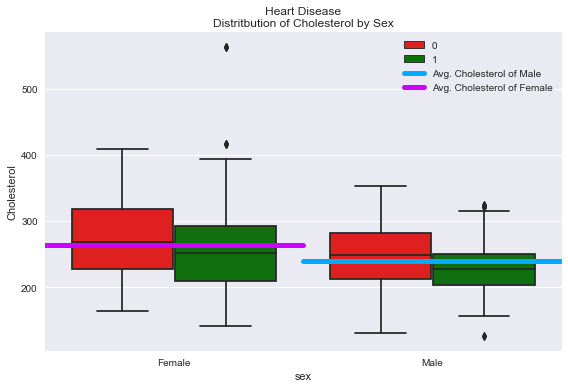

In [12]:
plt.title("Heart Disease\nDistritbution of Cholesterol by Sex")
sns.boxplot(x=X["sex"], y=X["chol"], hue=Y, palette=["red", "green"])

plt.ylabel("Cholesterol")
plt.xticks([0, 1], ["Female", "Male"])


plt.axhline(X[X["sex"]==1]["chol"].mean(), color="#00AAFF", label="Avg. Cholesterol of Male", xmin=0.5, linewidth=5)
plt.axhline(X[X["sex"]==0]["chol"].mean(), color="#CC00FF", label="Avg. Cholesterol of Female", xmin=0, xmax=0.5, linewidth=5)

plt.legend()
plt.tight_layout()

- Males with cholesterol 250+ have high chance of heart disease
- Females with cholesterol 260+ have high chance of heart disease

In [13]:
X.head()

,chol,thalach,cp,exang,age,sex,trestbps,fbs
0,244,178,3,0,42,1,148,0
1,278,152,2,0,66,0,146,0
2,246,173,2,0,53,1,130,1
3,248,122,0,0,58,0,100,0
4,282,95,0,1,53,1,123,0


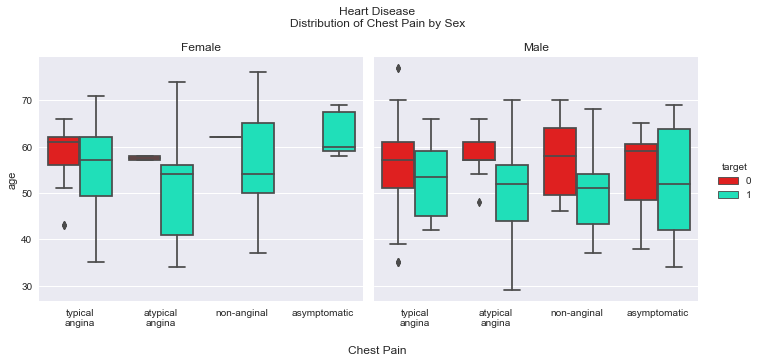

In [14]:
# sns.violinplot(x=X["cp"], y=X["age"], hue=Y, palette=["red", "#00FFCC"], )
g = sns.catplot(x="cp", y="age", col="sex", hue="target", data=train_data, kind="box", palette=["red", "#00FFCC"])
g.fig.suptitle("Heart Disease\nDistribution of Chest Pain by Sex")
g.set_xticklabels(["typical\nangina", "atypical\nangina", "non-anginal", "asymptomatic"])
g.fig.supxlabel("Chest Pain")
g.axes[0][0].set_title("Female")
g.axes[0][1].set_title("Male")
g.set_xlabels("")
g.tight_layout()

- Females having typical angina Chest pain have more chance of heart disease
- Males having non-anginal and asymptomatic pain have more chance of heart disease

## 5. Feature Scaling
- Using `Z-score normalization` to scale features

In [15]:
def standardization(X: pd.DataFrame) -> tuple[pd.DataFrame | float]:
    """
    Normalized data using Z-score normalization
    Args:
        X: data
    Returns:
        norm_data: normalized data
        mu (μ): mean of each feature
        sigma (σ): standard deviation of each feature
    """
    # calculating mean of each feature
    mu = np.mean(X, axis=0)
    # calculating standard deviation of each feature
    sigma = np.std(X, axis=0)
    # normalizing data
    norm_data = (X - mu) / sigma

    return norm_data, mu, sigma

In [16]:
X_scaled, mu, sigma = standardization(X)
X_scaled.head()

,chol,thalach,cp,exang,age,sex,trestbps,fbs
0,-0.058677,1.258177,1.977486,-0.720082,-1.405034,0.648956,0.947890,-0.422091
1,0.595166,0.128065,1.011710,-0.720082,1.262700,-1.540937,0.832696,-0.422091
2,-0.020216,1.040848,1.011710,-0.720082,-0.182322,0.648956,-0.088854,2.369157
3,0.018246,-1.175910,-0.919843,-0.720082,0.373456,-1.540937,-1.816760,-0.422091
4,0.672089,-2.349489,-0.919843,1.388730,-0.182322,0.648956,-0.492032,-0.422091


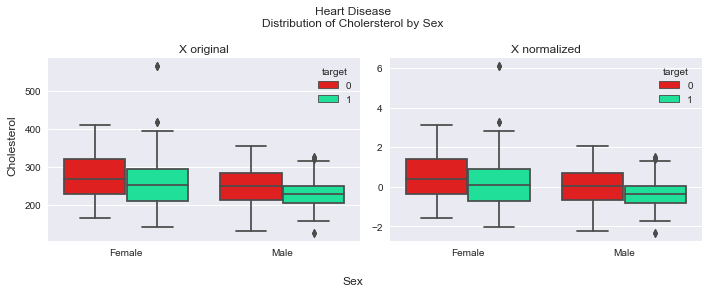

In [17]:
fig, (main, scaled) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Heart Disease\nDistribution of Cholersterol by Sex")
fig.supylabel("Cholesterol")
fig.supxlabel("Sex")

main = sns.boxplot(x=X["sex"], y=X["chol"], hue=Y, ax=main, palette=["red", "#00FFA0"])
main.set_title("X original")
main.set_xticklabels(["Female", "Male"])
main.set_xlabel("")
main.set_ylabel("")

scaled = sns.boxplot(x=X_scaled["sex"], y=X_scaled["chol"], hue=Y, ax=scaled, palette=["red", "#00FFA0"])
scaled.set_title("X normalized")
scaled.set_xticklabels(["Female", "Male"])
scaled.set_xlabel("")
scaled.set_ylabel("")

plt.tight_layout()

In [18]:
X_scaled

,chol,thalach,cp,exang,age,sex,trestbps,fbs
0,-0.058677,1.258177,1.977486,-0.720082,-1.405034,0.648956,0.947890,-0.422091
1,0.595166,0.128065,1.011710,-0.720082,1.262700,-1.540937,0.832696,-0.422091
2,-0.020216,1.040848,1.011710,-0.720082,-0.182322,0.648956,-0.088854,2.369157
3,0.018246,-1.175910,-0.919843,-0.720082,0.373456,-1.540937,-1.816760,-0.422091
4,0.672089,-2.349489,-0.919843,1.388730,-0.182322,0.648956,-0.492032,-0.422091
...,...,...,...,...,...,...,...,...
815,-1.885593,-1.002047,1.011710,-0.720082,-0.626945,0.648956,-0.780016,-0.422091
816,6.095144,0.475792,1.011710,-0.720082,1.373856,-1.540937,-0.952807,-0.422091
817,0.672089,1.084314,1.977486,-0.720082,1.151545,0.648956,0.371921,2.369157
818,-0.193292,-3.392669,-0.919843,-0.720082,1.373856,0.648956,-0.664822,-0.422091


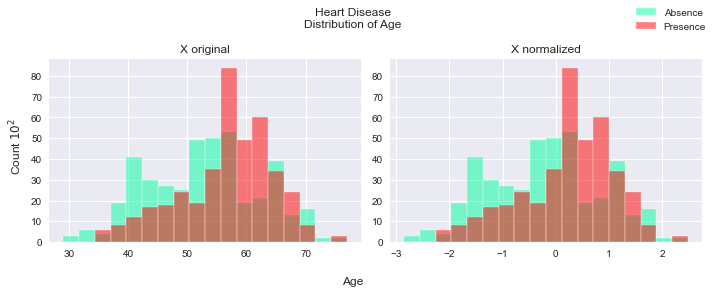

In [19]:
fig, (main, scaled) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Heart Disease\nDistribution of Age")
fig.supylabel("Count $10^2$")
fig.supxlabel("Age")

main = sns.histplot(x=X["age"], hue=Y, ax=main, palette=["red", "#00FFA0"])
main.set_title("X original")
main.set_xlabel("")
main.set_ylabel("")
main.get_legend().remove()

scaled = sns.histplot(x=X_scaled["age"], hue=Y, ax=scaled, palette=["red", "#00FFA0"])
scaled.set_title("X normalized")
scaled.set_xlabel("")
scaled.set_ylabel("")
scaled.get_legend().remove()

fig.legend(["Absence", "Presence"])
plt.tight_layout()

In [20]:
X = X_scaled

## 6. Using Logistic Regression

In [69]:
model = LogisticRegression(learning_rate=1, num_iters=360, verbose=True)

## 7. Fitting the training data

In [70]:
model.fit(X, Y)

Iteration | 	Cost	| 	                              W                               	 |      B      |
   36     | 4.50091e-01 | [-0.29793214  0.71202924  0.73516451 -0.54229563 -0.24663018 -0.88430466
 -0.364265    0.01670982] |    -0.00     |
   72     | 4.49943e-01 | [-0.32106177  0.73736475  0.75487683 -0.53166276 -0.24911397 -0.92545218
 -0.37668079  0.01669631] |    -0.00     |
   108    | 4.49941e-01 | [-0.32290458  0.74094554  0.75609569 -0.53020311 -0.24759687 -0.92784196
 -0.37811531  0.01650136] |    -0.00     |
   144    | 4.49941e-01 | [-0.32310905  0.74141646  0.75619788 -0.53001859 -0.24732627 -0.92804615
 -0.37829715  0.01646947] |    -0.00     |
   180    | 4.49941e-01 | [-0.32313427  0.74147763  0.75620876 -0.52999516 -0.24728837 -0.92806853
 -0.37832053  0.01646519] |    -0.00     |
   216    | 4.49941e-01 | [-0.32313748  0.74148555  0.75621007 -0.52999215 -0.24728336 -0.92807127
 -0.37832355  0.01646463] |    -0.00     |
   252    | 4.49941e-01 | [-0.32313789  0.74148

In [71]:
model.accuracy * 100

80.0

Accuracy is quite good!

## 7. Predicting *target* on test data
But before that:
- Selecting useful features
- Normalizing the data

In [72]:
test_data = test_data[features]
test_data, _, _= standardization(test_data)

In [73]:
test_preds = model.predict(test_data)
test_preds

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1])

In [68]:
test_data.head()

,chol,thalach,cp,exang,age,sex,trestbps,fbs
0,-0.177407,1.291979,1.094764,1.467599,-1.033006,0.712287,-0.104424,-0.405922
1,1.557309,0.115230,0.097312,-0.681385,0.471932,-1.403928,0.227467,2.463527
2,-1.105279,-0.233436,-0.900139,1.467599,1.009410,0.712287,0.448728,-0.405922
3,-0.621172,0.681813,1.094764,-0.681385,0.471932,0.712287,0.448728,2.463527
4,0.367213,-0.407769,-0.900139,1.467599,0.794418,0.712287,-0.657577,-0.405922


Ok, so now our model is ready!

Let's save the parameters into `model_params.json` file

In [66]:
import json
data = {
    "learning_rate":    model.learning_rate,
    "num_iters":        model.num_iters,
    "weights":          list(model.w_final),
    "bias":             model.intercept
}

with open("./model_params.json", "w") as f:
    json.dump(data, f, indent=4)